Developed a model to predict for 'Quality' applicants based on their financial history and the likelyhood of e-signing a loan.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dataset = pd.read_csv('Financial-Data.csv')

In [4]:
dataset.head(10)

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
5,8492423,21,weekly,0,2303,0,5,8,2,7,1,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
6,7948313,26,bi-weekly,0,2795,0,4,4,1,6,1,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
7,4297036,43,bi-weekly,0,5000,0,2,1,1,2,1,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1
8,6493191,32,semi-monthly,0,5260,3,0,3,1,4,1,1150,64050,0.652429,0.802433,0.593816,0.560389,0.569459,0.369459,3,1
9,8908605,51,bi-weekly,1,3055,0,6,11,4,2,1,600,59750,0.624666,0.968565,0.509919,0.749624,0.758607,0.758607,5,1


In [5]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [6]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [7]:
#Cleaning the data
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

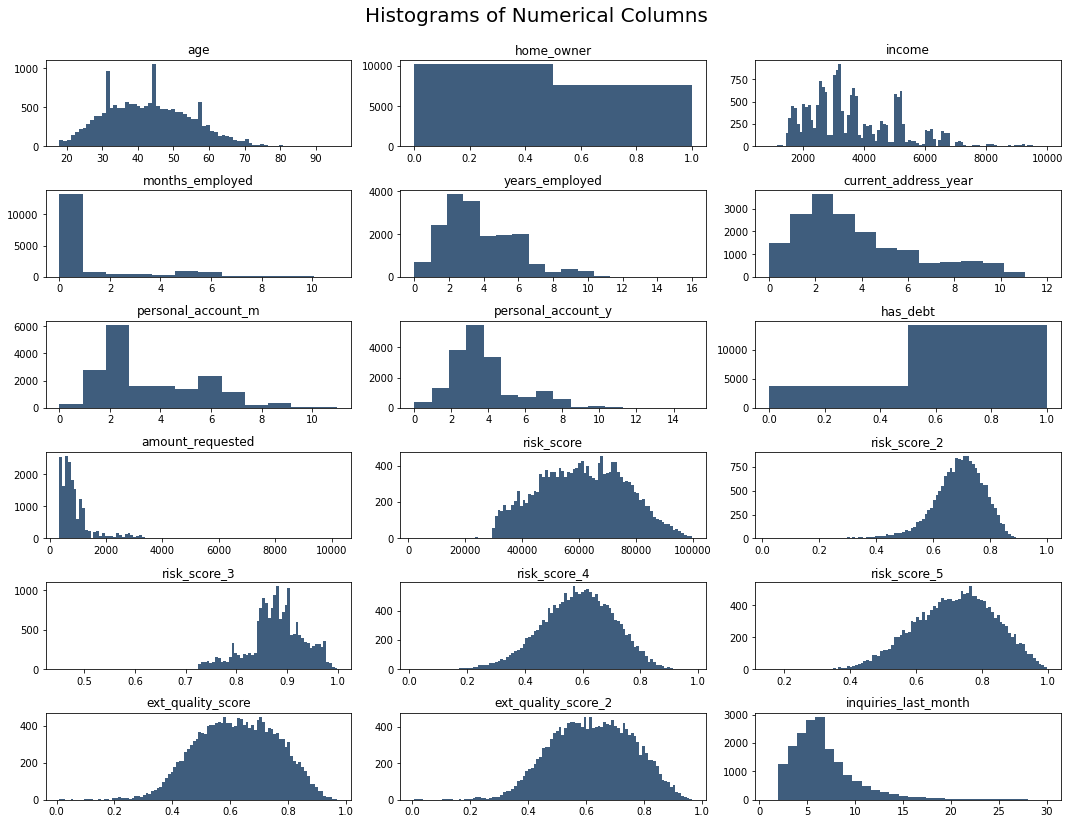

In [8]:
#Histograms
dataset2 = dataset.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])

fig = plt.figure(figsize = (15,12))
plt.suptitle('Histograms of Numerical Columns', fontsize = 20)
for i in range(dataset2.shape[1]):
  plt.subplot(6, 3, i + 1)
  f = plt.gca()
  f.set_title(dataset2.columns.values[i])

  vals = np.size(dataset2.iloc[:, i].unique())
  if vals >= 100:
    vals = 100
  
  plt.hist(dataset2.iloc[:, i], bins = vals, color = '#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

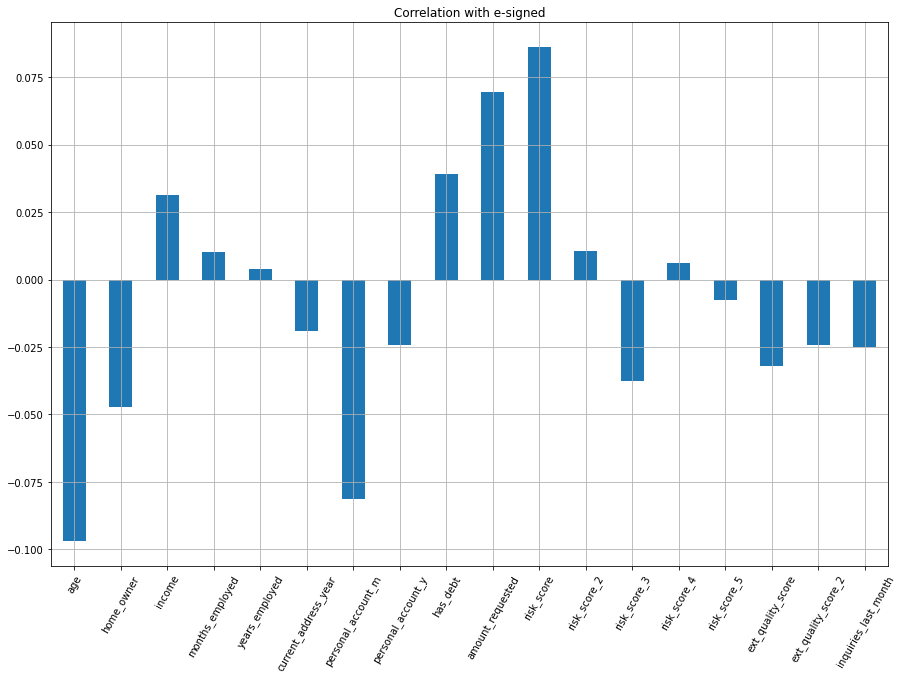

In [9]:
# Correlation Plot
dataset2.corrwith(dataset.e_signed).plot.bar(
    figsize = (15,10),
    title = "Correlation with e-signed",
    fontsize = 10,
    rot = 60,
    grid = True
)

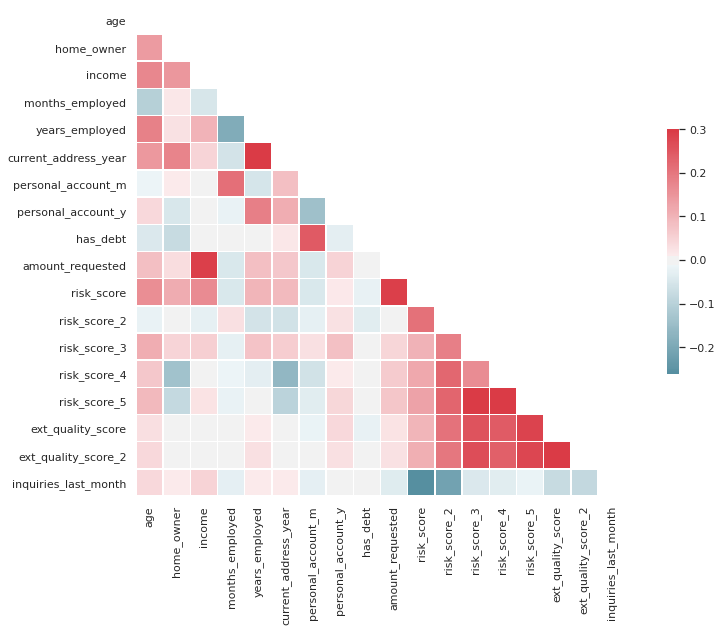

In [10]:
# Correlation Matrix
sns.set(style = 'white')

corr = dataset2.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (15, 9))

cmap = sns.diverging_palette(220, 10 , as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [0]:
import random 
import time
random.seed(100)

In [0]:
# Removing the column that appears to be faulty
dataset = dataset.drop(columns = ['months_employed'])

In [0]:
# Combining personal_account_m column with personal_account_y and convert he resulted column into months
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))

In [14]:
dataset[['personal_account_m', 'personal_account_y', 'personal_account_months']]

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98
...,...,...,...
17903,2,6,74
17904,3,3,39
17905,1,8,97
17906,6,1,18


In [0]:
dataset = dataset.drop(columns = ['personal_account_m', 'personal_account_y'])

In [16]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'years_employed', 'current_address_year', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed',
       'personal_account_months'],
      dtype='object')

In [0]:
# One Hot encoding
dataset = pd.get_dummies(dataset)

In [18]:
dataset.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [0]:
dataset = dataset.drop(columns = ['pay_schedule_semi-monthly'])

In [0]:
# Removing extra columns
response = dataset['e_signed'] 
users = dataset['entry_id']
dataset = dataset.drop(columns = ['e_signed', 'entry_id'])

In [0]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

# Model Building

## Comparing Models

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,
                                penalty = 'l2')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [0]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [0]:
results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

### SVM (Linear)

In [0]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [0]:
results = results.append(model_results, ignore_index = True)

In [30]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354


### SVM (RBF)

In [31]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (rbf)', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505


### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0, max_depth = 5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree (max_depth = 5)', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505
3,Decision Tree (max_depth = 5),0.609994,0.632551,0.657158,0.644620


### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100, criterion = 'entropy')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n = 100)', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505
3,Decision Tree (max_depth = 5),0.609994,0.632551,0.657158,0.644620
4,Random Forest (n = 100),0.621720,0.640098,0.678942,0.658948


In [34]:
# K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y= y_train,
                             cv = 12)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.63 (+/- 0.03)


##Parameter Tuning

### Applying Grid Search

In [35]:
# Round 1: Entropy
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]
              }
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10
                           )
t0 = time.time()
print(t0)
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Runtime: %0.2f seconds" % (t1 - t0))

1592047315.4446626
Runtime: 5508.68 seconds


In [36]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [37]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters 

(0.6345122647725013,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [38]:
# Round 2: Entropy
parameters = {"max_depth": [None],
              "max_features": [3, 5, 7],
              'min_samples_split': [1, 2, 3],
              'min_samples_leaf': [4, 5, 6],
              "bootstrap": [True],
              "criterion": ["entropy"]
              }
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1
                           )
t0 = time.time()
print(t0)
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Runtime: %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

1592054308.8759334
Runtime: 846.47 seconds


(0.6348606470778575,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 7,
  'min_samples_leaf': 6,
  'min_samples_split': 2})

In [39]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n = 100, GSx2 + Entropy)', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505
3,Decision Tree (max_depth = 5),0.609994,0.632551,0.657158,0.644620
4,Random Forest (n = 100),0.621720,0.640098,0.678942,0.658948
5,"Random Forest (n = 100, GSx2 + Entropy)",0.626466,0.641148,0.695021,0.666999


In [40]:
# Round 1: Gini
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]
              }
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1
                           )
t0 = time.time()
print(t0)
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Runtime: %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

1592055826.1845384
Runtime: 2453.67 seconds


(0.6353512282315882,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [41]:
# Round 2: Gini
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [4, 5, 6],
              "bootstrap": [True],
              "criterion": ["gini"]
              }
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1
                           )
t0 = time.time()
print(t0)
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Runtime: %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

1592058538.7871923
Runtime: 1350.37 seconds


(0.6353512282315882,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [42]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n = 100, GSx2 + Gini)', acc, prec, rec, f1]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.562535,0.576386,0.706432,0.634817
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (rbf),0.591569,0.605730,0.690871,0.645505
3,Decision Tree (max_depth = 5),0.609994,0.632551,0.657158,0.644620
4,Random Forest (n = 100),0.621720,0.640098,0.678942,0.658948
5,"Random Forest (n = 100, GSx2 + Entropy)",0.626466,0.641148,0.695021,0.666999
6,"Random Forest (n = 100, GSx2 + Gini)",0.639587,0.653494,0.703320,0.677492


## Final Results 

In [43]:
final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]
final_results

,entry_id,e_signed,predictions
8,6493191,1.0,0
9,8908605,1.0,0
12,6889184,1.0,1
16,9375601,0.0,1
18,8515555,1.0,1
...,...,...,...
17881,5028251,1.0,1
17888,8958068,0.0,0
17890,3605941,0.0,1
17901,1807355,0.0,1
